In [1]:
import os
import matplotlib
import plotly
import plotly.express as px
import seaborn as sns
import pandas as pd

In [2]:
DOE_NAME = "doe3"
factors = ["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type", "lr"]
response = "FIT"

In [3]:
df_res = pd.read_csv(DOE_NAME + "_res.csv")  # doe1_res.csv

In [4]:
df_res.sort_values(by=response, inplace=True, ascending=False)
df_res["RMSE"] = df_res["RMSE"].fillna(1000)
df_res["FIT"] = df_res["FIT"].fillna(0.0)
df_res["FIT"] = df_res["FIT"] * (df_res["FIT"] > 0) # minimum fit to 0% (easier to interpret)


In [5]:
for factor in factors:
    df_res[factor] = df_res[factor].astype("category")

In [6]:
df_res.head(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
213,74,0.001,10000,1800,128,80,100,forward,LSTM,15,216,98.586807,3.379619
36,103,0.010,10000,1800,1024,40,10,forward,FF,15,21,98.544006,3.481971
27,47,0.010,10000,1800,1024,80,50,forward,LSTM,15,209,98.534966,3.503588
31,11,0.010,10000,1800,128,80,10,forward,LSTM,15,282,98.496948,3.594505
53,15,0.010,10000,1800,1024,80,10,forward,LSTM,15,284,98.488426,3.614893
166,151,0.010,10000,1800,1024,256,50,forward,FF,15,212,98.468063,3.663574
32,10,0.001,10000,1800,128,80,10,forward,LSTM,15,166,98.466881,3.666418
285,111,0.010,10000,1800,1024,80,10,forward,FF,15,152,98.460037,3.682776
22,75,0.010,10000,1800,128,80,100,forward,LSTM,15,225,98.457626,3.688555
283,39,0.010,10000,1800,1024,40,50,forward,LSTM,15,64,98.449577,3.707796


In [7]:
df_res.tail(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
6,216,0.001,10000,300,128,512,10,forward,ZERO,15,262,85.888031,33.748388
33,280,0.001,10000,300,128,512,100,forward,ZERO,15,211,85.837570,33.869069
30,196,0.001,10000,300,1024,40,10,forward,ZERO,15,141,84.378204,37.359104
218,4,0.001,10000,300,1024,40,10,forward,LSTM,15,278,76.861397,55.335347
12,127,0.010,10000,1800,1024,512,10,forward,FF,15,217,0.000000,1000.000000
14,125,0.010,10000,300,1024,512,10,forward,FF,15,144,0.000000,1000.000000
19,155,0.010,10000,1800,128,512,50,forward,FF,15,58,0.000000,1000.000000
46,159,0.010,10000,1800,1024,512,50,forward,FF,15,50,0.000000,1000.000000
59,27,0.010,10000,1800,128,512,10,forward,LSTM,15,228,0.000000,1000.000000
66,57,0.010,10000,300,128,512,50,forward,LSTM,15,20,0.000000,1000.000000


/home/marco/anaconda3/envs/pytorch-ident/lib/python3.9/site-packages/pandas/io/formats/format.py:1405: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



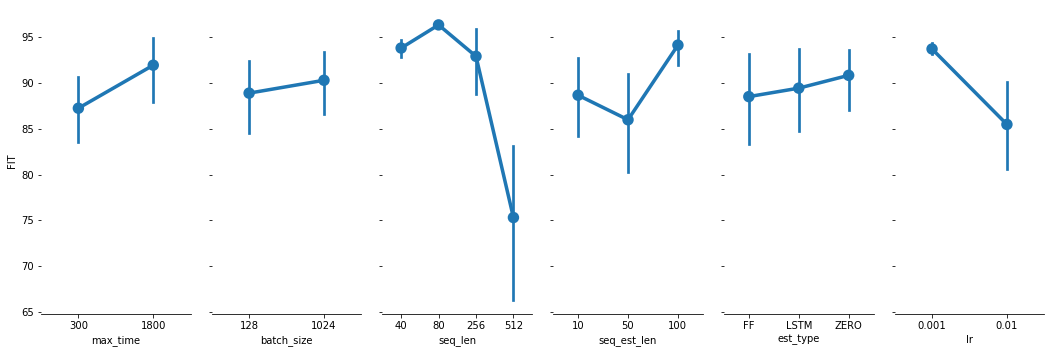

In [12]:
# Full results: main effects
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

In [41]:
for factor in factors:
    fig = px.box(df_res, y="FIT",
                     x=factor,
                     hover_data=["max_time", "est_hidden_size"])
    fig.show()

In [21]:
df_res.groupby("seq_len")["FIT"].agg(["mean", "std"])
#df_res.groupby("lr")["FIT"].agg(["mean", "std"])

,mean,std
seq_len,,
40,93.818623,4.089998
80,96.347014,1.765649
256,92.913131,16.049057
512,75.296880,37.436200


In [24]:
#pd.pivot_table(df_res, index=["seq_len"], columns=["est_type"])

In [54]:
fig = px.scatter(df_res, y="FIT",
                 facet_col="est_type", facet_row="est_direction", color="seq_len",
                 hover_data=["max_time", "seq_est_len"])
fig.show()

In [44]:
df_30min = df_res[(df_res["max_time"] != 300)]

/home/marco/anaconda3/envs/pytorch-ident/lib/python3.9/site-packages/pandas/io/formats/format.py:1405: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



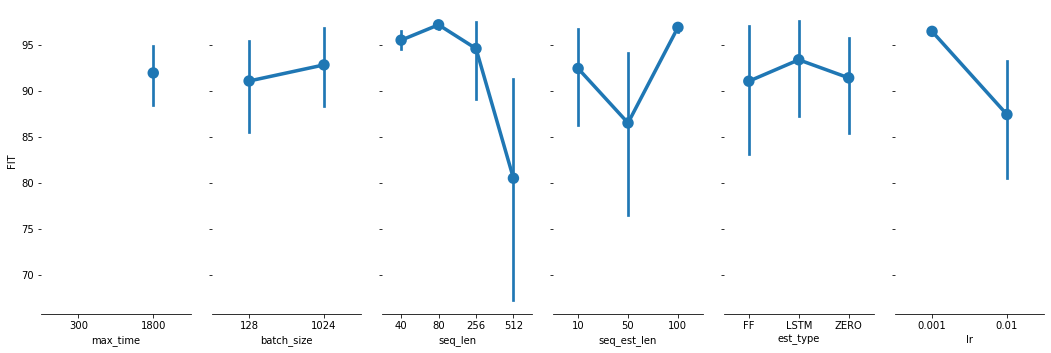

In [45]:
# Full results: main effects
g = sns.PairGrid(df_30min, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

In [51]:
df_zero= df_res[(df_res["max_time"] != 300) & ((df_res["est_type"] == "ZERO"))]

/home/marco/anaconda3/envs/pytorch-ident/lib/python3.9/site-packages/pandas/io/formats/format.py:1405: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



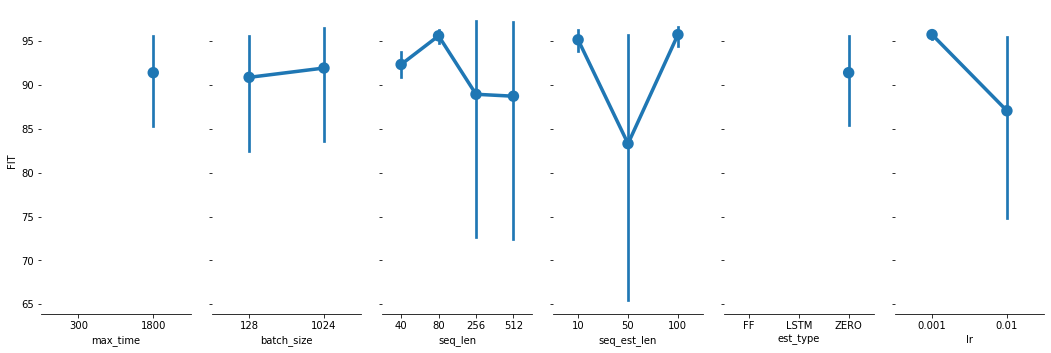

In [52]:
# Full results: main effects
g = sns.PairGrid(df_zero, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

In [48]:
df_5min = df_res[(df_res["max_time"] == 300)]

/home/marco/anaconda3/envs/pytorch-ident/lib/python3.9/site-packages/pandas/io/formats/format.py:1405: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



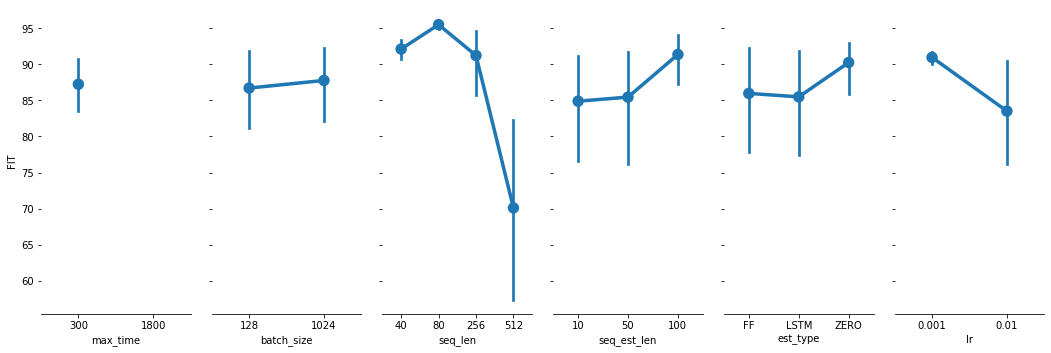

In [49]:
# Full results: main effects
g = sns.PairGrid(df_5min, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

In [26]:
df_good = df_res[(df_res["max_time"] != 300) & (df_res["est_type"]== "FF") & (df_res["lr"]== 0.01)]

/home/marco/anaconda3/envs/pytorch-ident/lib/python3.9/site-packages/pandas/io/formats/format.py:1405: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



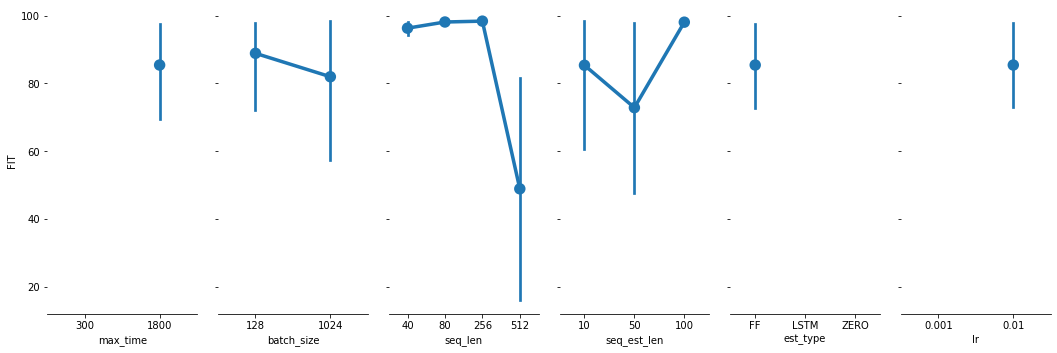

In [27]:
# Full results: main effects
g = sns.PairGrid(df_good, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)